# Kickstarter Data Exploration

This dataset is available on Kaggle (https://www.kaggle.com/kemical/kickstarter-projects). It contains information on Kickstarter projects from when Kickstarter began in 2009 through January of 2018. The table includes the following columns: ID (the internal kickstarter ID), name (the project name), category (the sub-category to which the project belongs), main_category (the main category to which the project belongs), currency (the currency in which monetary values are shown for the project), deadline (date and time when the project's funding campaign ends), goal (the amount of money required for the project to succeed and receive funding), launched (the date and time when the project went live), pledged (the amount of money pledged to the project), state (the project's current status: successful, failed, canceled, or live), backers (the number of people who have pledged money to the project), country (the country in which the project creator is located), usd pledged (the amount of money pledged converted to US dollars by kickstarter), usd_pledged_real (the amount of money pledged converted to US dollars using a script provided by a Kaggle user), and usd_goal_real (the project's funding goal converted to US dollars using the same script as the previous column).


For this data exploration I will focus on the main_category, backers, usd_goal_real, and state columns. I am interested in the popularity and success of the main project categories, and in whether funding goals vary among categories.


## Question 1: Which categories are most popular?

Let's look at how many projects are in each category, and how many backers each category has.

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

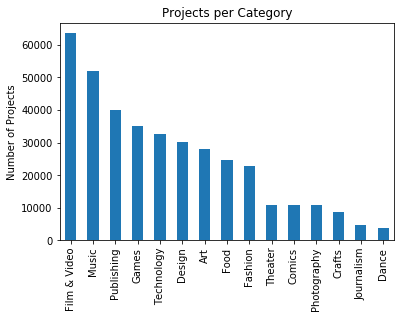

In [78]:
kicks = pd.read_csv("kickstarter-projects/ks-projects-201801.csv")

kicks.main_category.value_counts().plot(kind='bar')
plt.ylabel('Number of Projects')
plt.title('Projects per Category')
plt.show()

This figure shows Film & Video and Music are the most popular categories according to the number of projects in each category, while Dance and Journalism are the least popular by this measure. I find it interesting that Journalism is the second to least popular category, while Publishing is the third most popular. This observation highlights the value of understanding how the categories are defined and whether (and how) they are enforced in order to interpret the data accurately. 

Now I will examine popularity according to the total number of backers per category.

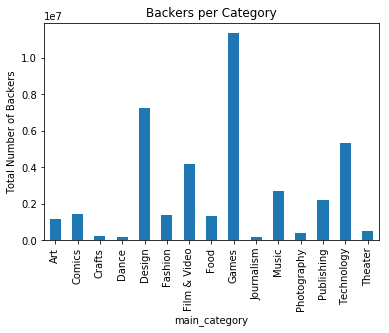

In [71]:
kicks.groupby('main_category').backers.sum().plot(kind='bar')
plt.ylabel('Total Number of Backers')
plt.title('Backers per Category')
plt.show()

The categories with the most backers are Games and Design, while Dance and Journalism have the fewest. Film & Video and Music comes in fourth and fifth place, respectively, in terms of the number of backers. The differences between the number of projects and number of backers per category are interesting and worthy of further investigation.

## Question 2: Which categories are most successful?

Next, I will examine which categories are most successful. I want to know the proportion of the total number of successful projects that each category represents, and each category's rate of success.

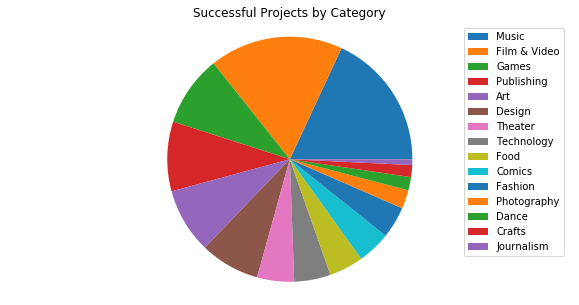

In [68]:
successes = kicks[kicks.state=='successful']
success_cat = successes.main_category.value_counts()

plt.figure(figsize=(10, 5))
plt.pie(success_cat)
plt.axis('equal')
plt.title('Successful Projects by Category')
plt.legend(success_cat.index)
plt.show()

Projects from the Music and Film & Video categories account for just over a third of the total number of successful projects. Games, Publishing, Art, and Design make up roughly a third as well, and the remaining nine categories make up the remaining fraction, under a third, of the successful projects. The percentage of successful projects from each category seems to follow the same general pattern as the total number of projects in each category (shown above). To get a better idea of differences in success among categories, I will next examine the success rate for each category. 

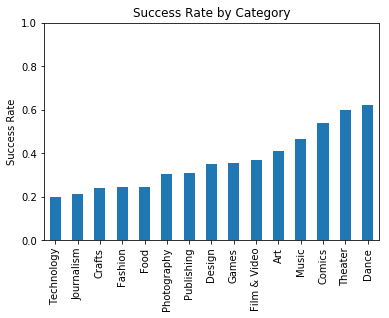

In [70]:
counts = successes.main_category.value_counts()
success_rates = (counts/kicks.main_category.value_counts()).sort_values()
success_rates.plot(kind='bar',ylim=(0.0,1.0))
plt.ylabel('Success Rate')
plt.title('Success Rate by Category')
plt.show()

Success rates vary among categories, ranging from just under 20% to just over 60%. Technology has the lowest success rate, though it ranks fifth in total number of projects and third in total number of backers. Also surprising is that Dance has the highest success rate, with over 60% of projects succeeding. While the total number of successes per category appears related to the total number of projects per category, the success rate does not follow the same pattern. 

## Question 3: Do funding goals vary among categories?

A project's funding goal may affect how likely it is to succeed, because higher goals are harder to achieve. Some categories may tend to have higher funding goals than others. 

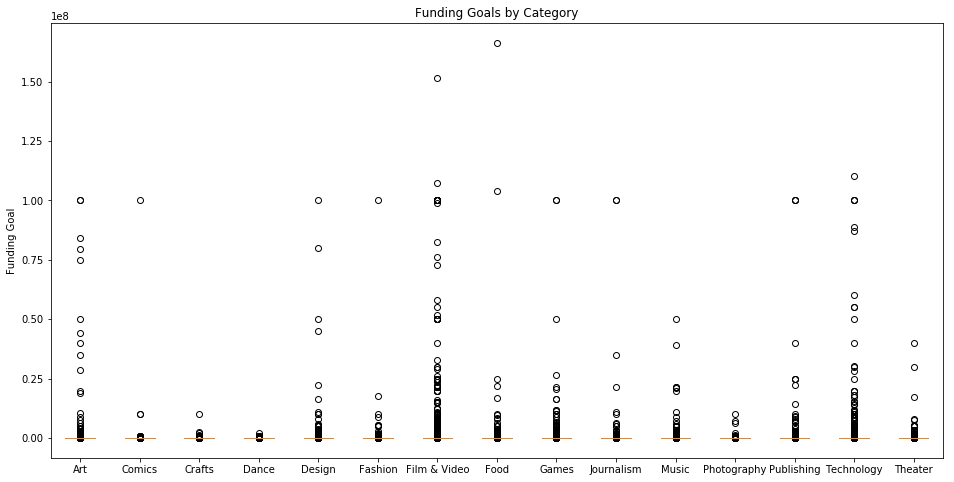

In [75]:
categories = kicks.groupby('main_category')
cat_goals = categories['usd_goal_real']
groups = dict()
for name,group in cat_goals:
    groups[name] = group
groups_series = pd.Series(groups)
plt.figure(figsize=(16,8))
plt.boxplot(groups_series,labels=groups.keys())
plt.title('Funding Goals by Category')
plt.ylabel('Funding Goal')
plt.show()

This figure shows box plots of the funding goals within each category. Dance, Photography, and Crafts have the narrowest and lowest range of funding goals. The outliers in many categories make it difficult to compare the full distributions among them simultaneously using box plots. To get a better idea of how the categories compare with one another, I will look at the mean funding goal for each category.

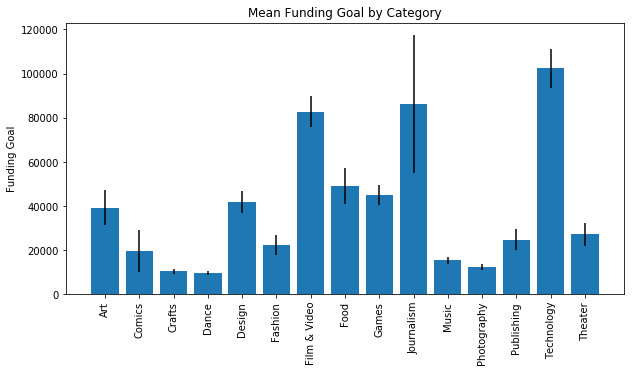

In [76]:
grouped = kicks.groupby('main_category')
goals_grouped = grouped['usd_goal_real']
mean_goals = goals_grouped.mean()
sem_goals = goals_grouped.sem()
plt.figure(figsize=(10,5))
ax = plt.axes(xticks=range(len(mean_goals)))
ax.set_xticklabels(mean_goals.index, rotation='vertical')
plt.bar(range(len(mean_goals)),mean_goals,yerr=sem_goals)
plt.ylabel('Funding Goal')
plt.title('Mean Funding Goal by Category')
plt.show()

This figure shows the mean funding goal by category with error bars representing the standard error. Technology and Journalism have the highest mean funding goals, while Dance has the lowest. This is interesting, as Technology and Journalism have the lowest success rates while Dance has the highest. Perhaps the mean funding goal of a category relates to its success rate. 

## Conclusions

Popularity varies widely among categories, and seems to differ between project creators and backers. Total numer of successful projects per category appears to relate to the total number of projects in each category, but success rate doesn't follow the same patten. Funding goals vary widely among categories and within categories to different degrees. The total number of projects, number of backers, and funding goals seem to relate to a category's success rate. 